In [1]:
import os
import sys
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
sys.path.append('/Users/iwatobipen/develop/chemoenv/psikit/psikit/')

In [2]:
from psikit import Psikit

In [3]:
pk = Psikit()

In [4]:
pk.read_from_smiles('OC(=O)c1cnccc1')

In [5]:
pk.optimize()

Optimizer: Optimization complete!


-434.31618866070147

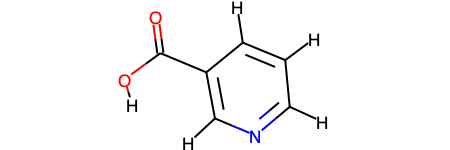

In [6]:
pk.mol

In [7]:
#caculate chages
print(pk.calc_resp_charges())
print(pk.calc_mulliken_charges())
print(pk.calc_lowdin_charges())

[-0.58253784  0.69011262 -0.50822101 -0.21638198  0.3090496  -0.58764823
  0.35116267 -0.29441912  0.00119611  0.40735602  0.06348114  0.06372305
  0.15143447  0.15169252]
[-0.60451003  0.82714117 -0.53442304 -0.24069704  0.13815438 -0.54392709
  0.1459902  -0.21533841 -0.04066254  0.35929545  0.15532705  0.16754771
  0.17394675  0.21215544]
[-0.27235014  0.34136197 -0.32165514 -0.12349265  0.00183538 -0.19122938
  0.02154698 -0.14202575 -0.0189029   0.22605628  0.10476005  0.11484402
  0.11953793  0.13971336]


In [8]:
mol = pk.mol
atoms = mol.GetAtoms()

In [9]:
data = {'Symbol':[atom.GetSymbol() for atom in atoms],
        'RESP': [float(atom.GetProp('RESP')) for atom in atoms],
        'MULLIKEN': [float(atom.GetProp('MULLIKEN')) for atom in atoms],
       'LOWDIN':  [float(atom.GetProp('LOWDIN')) for atom in atoms]}

In [10]:
df = pd.DataFrame(data)

In [11]:
df.round(3)

,LOWDIN,MULLIKEN,RESP,Symbol
0,-0.272,-0.605,-0.583,O
1,0.341,0.827,0.690,C
2,-0.322,-0.534,-0.508,O
3,-0.123,-0.241,-0.216,C
4,0.002,0.138,0.309,C
5,-0.191,-0.544,-0.588,N
6,0.022,0.146,0.351,C
7,-0.142,-0.215,-0.294,C
8,-0.019,-0.041,0.001,C
9,0.226,0.359,0.407,H


In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

In [13]:
plt.style.use('ggplot')

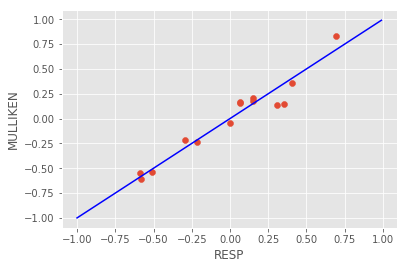

In [14]:
# RESP charge and MULLIKEN charge shows high correlation
plt.scatter(df.RESP, df.MULLIKEN)
plt.xlabel('RESP')
plt.ylabel('MULLIKEN')
plt.plot(np.arange(-1.0, 1.0, 0.01), np.arange(-1.0, 1.0, 0.01), c='b')

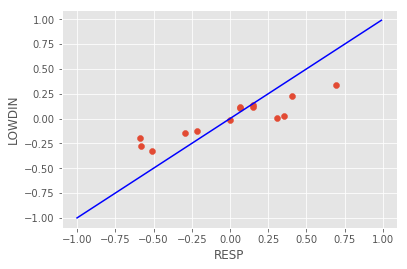

In [15]:
plt.scatter(df.RESP, df.LOWDIN)
plt.xlabel('RESP')
plt.ylabel('LOWDIN')
plt.plot(np.arange(-1.0, 1.0, 0.01), np.arange(-1.0, 1.0, 0.01), c='b')

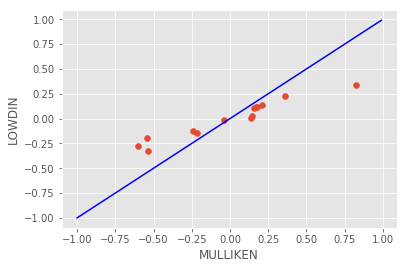

In [16]:
plt.scatter(df.MULLIKEN, df.LOWDIN)
plt.xlabel('MULLIKEN')
plt.ylabel('LOWDIN')
plt.plot(np.arange(-1.0, 1.0, 0.01), np.arange(-1.0, 1.0, 0.01), c='b')